In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-reportscsv/Crime_Reports.csv


In [47]:
chunksize = 10 ** 3
data = pd.read_csv("/kaggle/input/crime-reportscsv/Crime_Reports.csv", nrows=1000)

In [48]:
data.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20121171927,RECKLESS DAMAGE,1401,N,04/26/2012 10:34:00 PM,04/26/2012,2234.0,04/26/2012 11:04:00 PM,04/26/2012,2304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20072871892,FAMILY DISTURBANCE,3400,N,10/14/2007 08:01:00 PM,10/14/2007,2001.0,10/14/2007 08:01:00 PM,10/14/2007,2001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006471156,FAMILY DISTURBANCE,3400,N,02/16/2006 02:25:00 PM,02/16/2006,1425.0,02/16/2006 02:25:00 PM,02/16/2006,1425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20045017276,IDENTITY THEFT,4022,N,07/31/2003 12:00:00 PM,07/31/2003,1200.0,04/14/2004 09:45:00 AM,04/14/2004,945,...,NaN,NaN,09/01/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20173300229,FAMILY DISTURBANCE,3400,N,11/26/2017 07:43:00 AM,11/26/2017,743.0,11/26/2017 07:43:00 AM,11/26/2017,743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
data.shape

(1000, 27)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Incident Number              1000 non-null   int64  
 1   Highest Offense Description  1000 non-null   object 
 2   Highest Offense Code         1000 non-null   int64  
 3   Family Violence              1000 non-null   object 
 4   Occurred Date Time           999 non-null    object 
 5   Occurred Date                1000 non-null   object 
 6   Occurred Time                999 non-null    float64
 7   Report Date Time             1000 non-null   object 
 8   Report Date                  1000 non-null   object 
 9   Report Time                  1000 non-null   int64  
 10  Location Type                960 non-null    object 
 11  Address                      999 non-null    object 
 12  Zip Code                     408 non-null    float64
 13  Council District   

In [51]:
data.isnull()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,True,True,True,True
996,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,True,True,True
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
998,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,True,True,True


In [53]:
data.isnull().sum()

Incident Number                   0
Highest Offense Description       0
Highest Offense Code              0
Family Violence                   0
Occurred Date Time                1
Occurred Date                     0
Occurred Time                     1
Report Date Time                  0
Report Date                       0
Report Time                       0
Location Type                    40
Address                           1
Zip Code                        592
Council District                604
APD Sector                      428
APD District                    448
PRA                             570
Census Tract                    595
Clearance Status                262
Clearance Date                  151
UCR Category                    695
Category Description            695
X-coordinate                    547
Y-coordinate                    547
Latitude                       1000
Longitude                      1000
Location                       1000
dtype: int64

In [54]:
data.dtypes

Incident Number                  int64
Highest Offense Description     object
Highest Offense Code             int64
Family Violence                 object
Occurred Date Time              object
Occurred Date                   object
Occurred Time                  float64
Report Date Time                object
Report Date                     object
Report Time                      int64
Location Type                   object
Address                         object
Zip Code                       float64
Council District               float64
APD Sector                      object
APD District                    object
PRA                            float64
Census Tract                   float64
Clearance Status                object
Clearance Date                  object
UCR Category                    object
Category Description            object
X-coordinate                   float64
Y-coordinate                   float64
Latitude                       float64
Longitude                

In [55]:
data['date'] = data['Occurred Date Time'].astype('category')
data['severity'] = data['Highest Offense Code'].astype('category')

In [56]:
data.dtypes

Incident Number                   int64
Highest Offense Description      object
Highest Offense Code              int64
Family Violence                  object
Occurred Date Time               object
Occurred Date                    object
Occurred Time                   float64
Report Date Time                 object
Report Date                      object
Report Time                       int64
Location Type                    object
Address                          object
Zip Code                        float64
Council District                float64
APD Sector                       object
APD District                     object
PRA                             float64
Census Tract                    float64
Clearance Status                 object
Clearance Date                   object
UCR Category                     object
Category Description             object
X-coordinate                    float64
Y-coordinate                    float64
Latitude                        float64


In [57]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Incident Number,1000.0,3.628991e+10,1.880662e+11,200760445.0,2.004505e+10,2.009320e+10,2.015504e+10,2.004321e+12
Highest Offense Code,1000.0,1.961507e+03,1.255741e+03,200.0,9.000000e+02,1.709000e+03,3.400000e+03,4.205000e+03
Occurred Time,999.0,1.284631e+03,6.536049e+02,0.0,9.000000e+02,1.343000e+03,1.804000e+03,2.359000e+03
Report Time,1000.0,1.348301e+03,5.815914e+02,0.0,1.008000e+03,1.406500e+03,1.801000e+03,2.359000e+03
Zip Code,408.0,7.872515e+04,2.237715e+01,78617.0,7.870400e+04,7.872300e+04,7.874400e+04,7.875900e+04
Council District,396.0,4.409091e+00,3.075311e+00,1.0,2.000000e+00,3.000000e+00,9.000000e+00,1.000000e+01
PRA,430.0,4.398814e+02,4.152973e+02,0.0,3.472500e+02,4.220000e+02,4.840000e+02,6.202000e+03
Census Tract,405.0,1.195536e+02,1.057919e+03,1.0,1.100000e+01,2.100000e+01,2.316000e+01,2.050400e+04
X-coordinate,453.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Y-coordinate,453.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [61]:
date_data = data.groupby("Occurred Date Time").mean().round(2)

In [62]:
date_data

,Incident Number,Highest Offense Code,Occurred Time,Report Time,Zip Code,Council District,PRA,Census Tract,X-coordinate,Y-coordinate,Latitude,Longitude,Location
Occurred Date Time,,,,,,,,,,,,,
01/01/2007 12:01:00 AM,2.011347e+10,206.0,1.0,1538.0,78742.5,2.5,475.0,23.64,0.0,0.0,NaN,NaN,NaN
01/01/2009 12:01:00 AM,2.013851e+09,1707.0,1.0,1656.0,78705.0,9.0,348.0,4.00,0.0,0.0,NaN,NaN,NaN
01/01/2012 12:00:00 AM,2.012371e+09,1700.0,0.0,1412.0,78723.0,1.0,297.0,21.12,0.0,0.0,NaN,NaN,NaN
01/01/2013 02:34:00 PM,2.013502e+10,4022.0,1434.0,1434.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/01/2016 01:00:00 AM,2.017500e+10,204.0,100.0,1334.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/29/2014 05:30:00 PM,2.014364e+10,619.0,1730.0,830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12/30/2007 01:26:00 PM,2.007364e+10,900.0,1326.0,1326.0,78741.0,3.0,458.0,23.14,0.0,0.0,NaN,NaN,NaN
12/30/2013 08:03:00 AM,2.013364e+10,3401.0,803.0,921.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


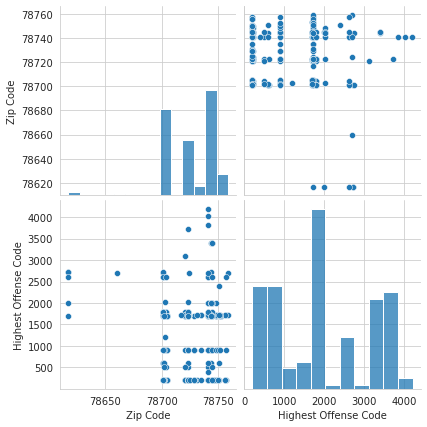

In [63]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(
    data[["Zip Code", "Highest Offense Code",]],
    height = 3,
    palette = "Set1")

<AxesSubplot:>

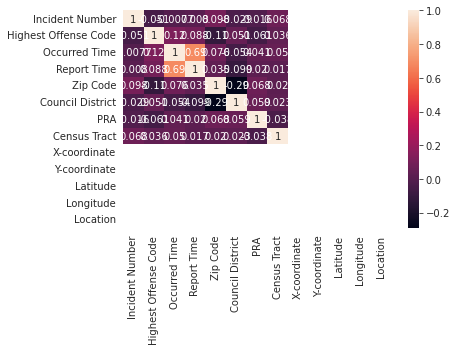

In [64]:
sns.heatmap(data.corr(), annot= True)

In [65]:
data = pd.get_dummies(data)

In [66]:
data.columns

Index(['Incident Number', 'Highest Offense Code', 'Occurred Time',
       'Report Time', 'Zip Code', 'Council District', 'PRA', 'Census Tract',
       'X-coordinate', 'Y-coordinate',
       ...
       'severity_3402', 'severity_3442', 'severity_3458', 'severity_3722',
       'severity_3817', 'severity_3829', 'severity_4003', 'severity_4022',
       'severity_4199', 'severity_4205'],
      dtype='object', length=6578)

In [67]:
cols_with_missing = [col for col in data.columns 
                                 if data[col].isnull().any()]
reduced_data = data.drop(cols_with_missing, axis=1)

In [68]:
y = reduced_data["Highest Offense Code"]

In [69]:
X = reduced_data.drop("Highest Offense Code", axis = 1)

In [70]:
reduced_data.head()

,Incident Number,Highest Offense Code,Report Time,Highest Offense Description_AGG ASSAULT FAM/DATE VIOLENCE,Highest Offense Description_AGG FORCED SODOMY OF CHILD,Highest Offense Description_AGG RAPE,Highest Offense Description_AGG RAPE OF A CHILD,Highest Offense Description_AGG SEXUAL ASSAULT CHILD/OBJEC,Highest Offense Description_AGG SEXUAL ASSAULT W OBJECT,Highest Offense Description_APPLIC TO REVOKE PROBATION,...,severity_3402,severity_3442,severity_3458,severity_3722,severity_3817,severity_3829,severity_4003,severity_4022,severity_4199,severity_4205
0,20121171927,1401,2304,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20072871892,3400,2001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2006471156,3400,1425,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20045017276,4022,945,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,20173300229,3400,743,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,y, 
    train_size = 0.80, 
    random_state = 1)

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()



In [74]:
lr.fit(X_train,y_train)

LinearRegression()

In [75]:
lr.score(X_test, y_test).round(3)

0.918

In [77]:
lr.score(X_train, y_train).round(3)

1.0

In [78]:
y_pred = lr.predict(X_test)

In [79]:
from sklearn.metrics import mean_squared_error

In [82]:
import math
math.sqrt(mean_squared_error(y_test, y_pred))

334.60249281154614

In [81]:
data_new = X_train[:1]
lr.predict(data_new)

array([202.57603151])

In [83]:
y_train[:1]

382    204
Name: Highest Offense Code, dtype: int64